# imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Loading File

In [2]:
files = glob.glob('./dataset/*.csv')

In [3]:
files

['./dataset\\Calllog-all_1.csv', './dataset\\Calllog-all_2.csv']

In [4]:
data = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [5]:
data.head()

,Name,Date,Type,Duration(sec)
0,NaN,27-02-2019 11:17,ALL,0.0
1,ct,27-02-2019 11:05,OUTGOING,72.0
2,ct,27-02-2019 11:01,MISSED,0.0
3,ct,27-02-2019 10:51,ALL,0.0
4,ct,27-02-2019 10:28,OUTGOING,0.0


PS: Since its my personal data therefore, I have changed the name and removed the phone number.

## Preprocessing
STEP I: We will remove all the entries whos name is not stored in our contact. i.e. NaN entry in 'Name' column. 

STEP II: We will only consider outgoing call. Therefore we will remove all other types of phone call like ALL/MISSED/...



In [6]:
#STEP I
data.dropna(inplace=True)

In [7]:
data.head()

,Name,Date,Type,Duration(sec)
1,ct,27-02-2019 11:05,OUTGOING,72.0
2,ct,27-02-2019 11:01,MISSED,0.0
3,ct,27-02-2019 10:51,ALL,0.0
4,ct,27-02-2019 10:28,OUTGOING,0.0
5,sd,27-02-2019 10:28,OUTGOING,14.0


In [8]:
#STEP II
data = data[data['Type']=='OUTGOING']

In [9]:
data.reset_index(inplace=True, drop=True)
data.head()

,Name,Date,Type,Duration(sec)
0,ct,27-02-2019 11:05,OUTGOING,72.0
1,ct,27-02-2019 10:28,OUTGOING,0.0
2,sd,27-02-2019 10:28,OUTGOING,14.0
3,sd,26-02-2019 10:32,OUTGOING,29.0
4,sk,25-02-2019 23:28,OUTGOING,360.0


STEP III: Create a 'Day_Number' column from given 'Date' column.

STEP IV: Extracting hours and minutes from 'Date' column. And creating a new column name 'Time'.

In [10]:
#STEP III
data['Date'] = pd.to_datetime(data['Date']) #First we have to convert 'Date' column in pandas Timestamp
data['Day_number'] = data['Date'].dt.dayofweek

#Just for fun makin one more column 'Day_name'
data['Day_name'] = data['Date'].dt.day_name()

In [11]:
data.head()

,Name,Date,Type,Duration(sec),Day_number,Day_name
0,ct,2019-02-27 11:05:00,OUTGOING,72.0,2,Wednesday
1,ct,2019-02-27 10:28:00,OUTGOING,0.0,2,Wednesday
2,sd,2019-02-27 10:28:00,OUTGOING,14.0,2,Wednesday
3,sd,2019-02-26 10:32:00,OUTGOING,29.0,1,Tuesday
4,sk,2019-02-25 23:28:00,OUTGOING,360.0,0,Monday


In [12]:
#STEP IV
def twodigit(t):
    if len(t)==1:
        return '0'+t
    else:
        return t

The above step can be divinded into following parts:
a) First we extracted hour part from the series 
b) Convert it into string
c) Same done for minute
d) Padding extra 0 (twodigit) in front of hr and  min only if they are single digit value, this will maintain th order
e) Finally concatenate hr and min.

In [13]:
data['Time'] = data['Date'].dt.hour.astype(str).apply(twodigit)+data['Date'].dt.minute.astype(str).apply(twodigit)
data['Time'] = data['Time'].astype('int64')

In [14]:
data.head()

,Name,Date,Type,Duration(sec),Day_number,Day_name,Time
0,ct,2019-02-27 11:05:00,OUTGOING,72.0,2,Wednesday,1105
1,ct,2019-02-27 10:28:00,OUTGOING,0.0,2,Wednesday,1028
2,sd,2019-02-27 10:28:00,OUTGOING,14.0,2,Wednesday,1028
3,sd,2019-02-26 10:32:00,OUTGOING,29.0,1,Tuesday,1032
4,sk,2019-02-25 23:28:00,OUTGOING,360.0,0,Monday,2328


# Visualization 

Text(0.5, 1.0, 'Contact wrt Day/Time')

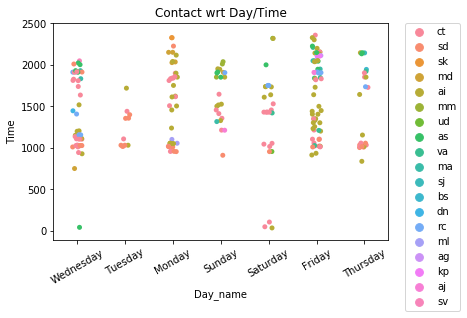

In [15]:
sns.stripplot(x='Day_name', y='Time',
                data=data,
                hue='Name', jitter=0.1)
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Contact wrt Day/Time", )

# Saving data
For now we will only save 'Name', 'Day_name' and 'Time'

In [16]:
data[['Day_name', 'Time', 'Name']].head()

,Day_name,Time,Name
0,Wednesday,1105,ct
1,Wednesday,1028,ct
2,Wednesday,1028,sd
3,Tuesday,1032,sd
4,Monday,2328,sk


In [17]:
data[['Day_name', 'Time', 'Name']].to_csv('final_data.csv', index=False)

# End